In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import keras
from keras.datasets import mnist
%matplotlib inline
cv2.__version__
#Anna Meleshko


Using TensorFlow backend.


'4.1.2'

11493376/11490434 [==============================] - 1s 0us/step


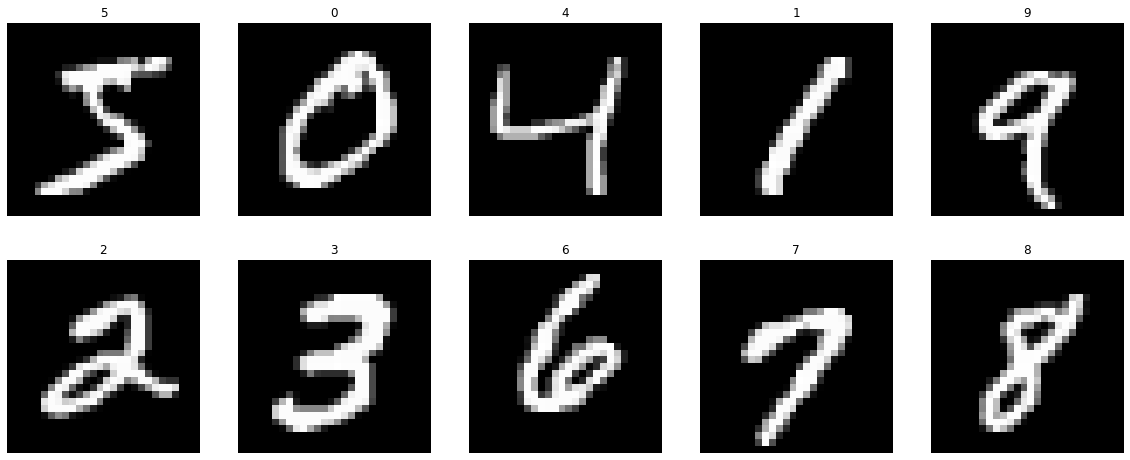

In [2]:
#1.a
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#1.b
def load_data_and_plot(xtrain ,ytrain):
  lst_of_numbers = {}
  plt.figure(figsize = [20, 8])
  i = 0
  for label,img in zip(ytrain, xtrain):
    if label not in lst_of_numbers.keys():
      lst_of_numbers[label] = []
      plt.subplot(2, 5, i + 1)
      plt.imshow(img, cmap = 'gray')
      plt.title(label)
      plt.axis('off')
      i += 1
    lst_of_numbers[label] += [img]
  plt.show()
  return lst_of_numbers

all_data = load_data_and_plot(x_train ,y_train)

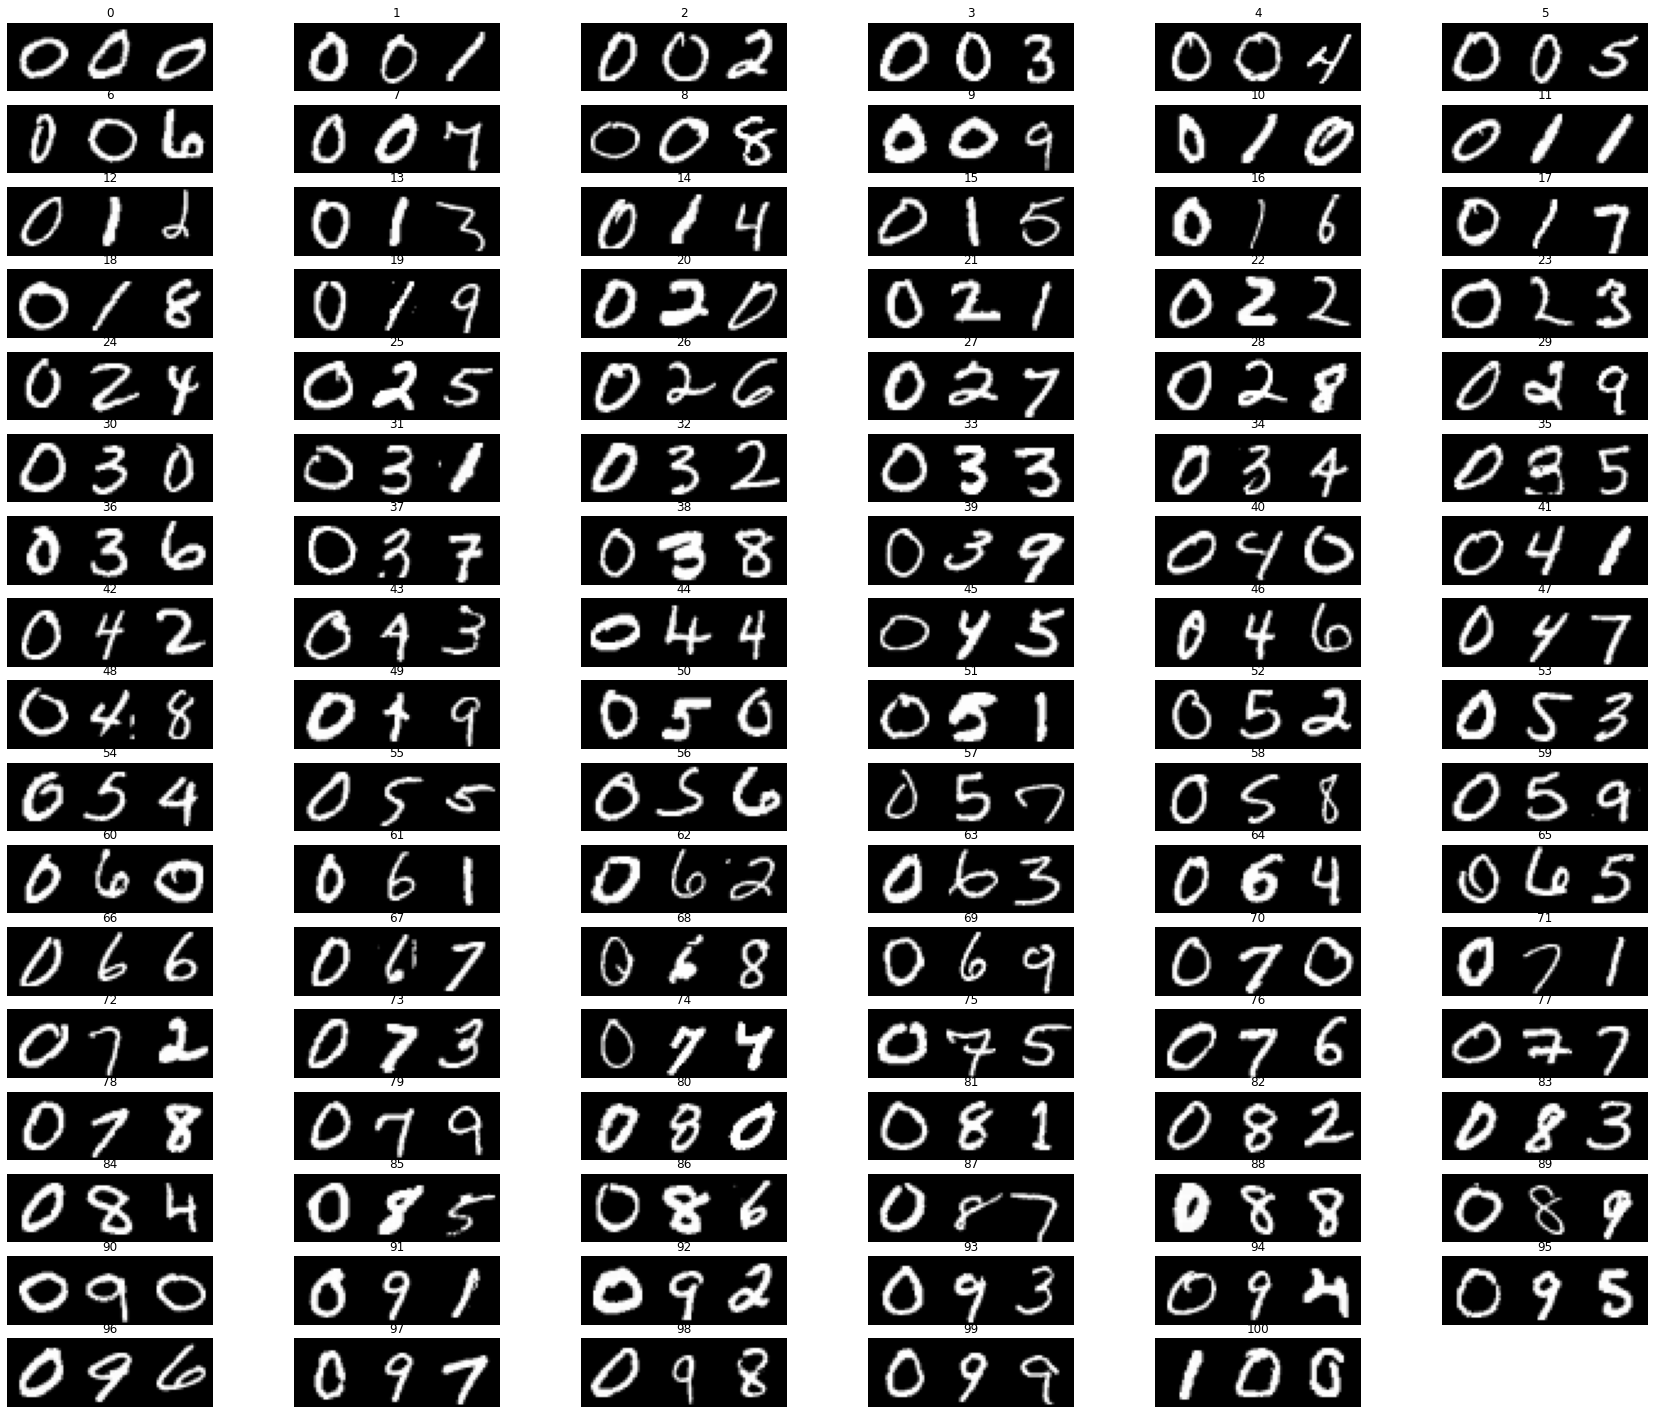

In [14]:
#1.c
def create_numbers_from_data(data):
  new_db = {}
  for number in range (0,101):
    new_db[number] = []
    for _ in range (0,600):
      new_image = np.zeros((28,84)) #size of new image
      unity = number % 10
      dozens = number // 10
      if number > 99:
        dozens = dozens % 10 
      hundreds = number // 100
      unity_img_lst = data[unity] #list of images of a number
      dozens_img_lst = data[dozens]
      hundreds_img_lst = data[hundreds] 
      which_unity_image = np.random.randint(0,len(unity_img_lst)) 
      which_dozens_image = np.random.randint(0,len(dozens_img_lst)) 
      which_hundreds_image = np.random.randint(0,len(hundreds_img_lst)) 
      unity_img = data[unity][which_unity_image] #unity of a number
      dozens_img = data[dozens][which_dozens_image] #dozen of a number
      hundreds_img = data[hundreds][which_hundreds_image] #hundreds of a number
      new_image[ :28, 56:84] = unity_img
      new_image[ :28, 28:56] = dozens_img
      new_image[ :28, :28] = hundreds_img
      new_db[number] += [new_image]
      # new_db = np.unique(new_db[number])
  return new_db
 
# 1.d
def show_new_data(data):
  plt.figure(figsize=[30,30])
  for number in range(0,101):
    plt.subplot(20, 6, number + 1)
    plt.title(number)
    plt.imshow(data[number][0],cmap = 'gray')
    plt.axis('off')


new_data = create_numbers_from_data(all_data)
show_new_data(new_data)


In [0]:
import scipy.signal

class Augmentation(object):

  def __init__(self,image):
    self.image = image
    self.flipped_img = None
    self.rotated_img = None
    self.gauss_img = None
    self.median_img = None
    self.zoom_img = None
    self.crop_img = None
    self.sharpen_img = None
    self.contrast_img = None
    self.grayscale_img = None
    self.resize_img = None
    self.emboss_img = None
    self.canny_edge_detecet_img = None
    self.sobel_edge_detactor_img = None
    self.draw_contours_img = None
    self.add_light_img = None
    self.saturation_img = None
    self.salt_and_paper_img = None

  def flip(self, image ,vertical = False):
    if vertical:
      self.flipped_img = cv2.flip(self.image, 0)
    if not vertical:
      self.flipped_img = cv2.flip(self.image, 1)
    return self.flipped_img

  def rotate(self, image, angle :float):
    self.rotated_img = rotate_image(image, angle)
    return self.rotated_img

  def gaussian_Blur(self, image, k_size:int , sigmax :int ):
    self.gauss_img = cv2.GaussianBlur(image,k_size,sigmax,cv2.BORDER_DEFAULT)
    return self.gauss_img

  def median_Blur(self, image, k_size: int):
    self.median_img = cv2.medianBlur(image,k_size)
    return self.median_img

  def zoom(self, image, dsize: tuple, sizeOfZoom):
    width, height = dsize[0] ,dsize[1]
    center_y, center_x = int(height /2) ,int(width/2) 
    new_locy, new_locx = int(center_y/sizeOfZoom), int(center_x/sizeOfZoom)
    y_low, x_low = center_y - new_locy, center_x - new_locx 
    y_high, x_high = center_y + new_locy, center_x + new_locx 
    self.zoom_img = self.image[y_low: y_high, x_low: x_high]
    self.zoom_img = cv2.resize(self.image, (width, height), cv2.INTER_LINEAR)
    return self.zoom_img

  def crop(self, image, low_y, high_y, low_x, high_x):
    self.crop_img = image[low_y : high_y, low_x : high_x]
    print(self.crop_img.shape)
    return self.crop_img

  def sharpen(self): 
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    self.sharpen_img = cv2.filter2D(self.image, -1,kernel)
    return self.sharpen_img

  def gray_scale(self,img):
    if len(img.shape) == 3: 
      return cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img

  def resize(self , width ,height): 
    self.resize_img = cv2.resize(self.image, (width, height))
    return self.resize_img

  def emboss(self): 
    kernel = np.array([[0,-1,-1],[1,0,-1],[1,1,0]])
    self.emboss_img = cv2.filter2D(self.image ,-1 ,kernel) + 128
    return self.emboss_img

  def canny_edge_detecet(self , tresh_low ,thresh_high):
    self.canny_edge_detecet_img = cv2.Canny(self.image, tresh_low, thresh_high)
    return self.canny_edge_detecet_img

  def sobel_edge_detactor(self,img, dx, dy, kernelx, kernely):
    if len(img.shape) == 3: 
      img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    if dx == 1:
      image_x = scipy.signal.convolve2d(img, kernelx, 'same')
      self.sobel_edge_detactor_img = np.sqrt(np.square(image_x))
      self.sobel_edge_detactor_img *= 255.0 / self.sobel_edge_detactor_img.max()
    if dy == 1:
      image_y = scipy.signal.convolve2d(img, kernely, 'same')
      self.sobel_edge_detactor_img = np.sqrt(np.square(image_y))
      self.sobel_edge_detactor_img *= 255.0 / self.sobel_edge_detactor_img.max()
    if dy == 1 and dx == 1:
      image_x = scipy.signal.convolve2d(img, kernelx, 'same')
      image_y = scipy.signal.convolve2d(img, kernely, 'same')
      self.sobel_edge_detactor_img = np.sqrt(np.square(image_x) + np.square(image_y))
      self.sobel_edge_detactor_img *= 255.0 / self.sobel_edge_detactor_img.max()
    return self.sobel_edge_detactor_img

  def add_light(self, gamma=2.0):
    invGamma = 1.0 / gamma
    lst = []
    for i in np.arange(0, 256):
      i = ((i / 255.0) ** invGamma) * 255
      lst += [i]
    table = np.array(lst).astype("uint8")
    self.add_light_img = cv2.LUT(self.image, table)
    return self.add_light_img

  def saturation(self, saturation):
    self.image = cv2.cvtColor(self.image, cv2.COLOR_BGR2HSV)
    v = self.image[:, :, 2]
    v = np.where(v <= 255 - saturation, v + saturation, 255)
    self.image[:, :, 2] = v
    self.saturation_img = cv2.cvtColor(self.image, cv2.COLOR_HSV2BGR)  
    return self.saturation_img

  def salt_and_paper(self, p, a):
    self.image = cv2.cvtColor(self.image,cv2.COLOR_RGB2GRAY)
    self.salt_and_paper_img = self.image
    #salt
    num_salt = np.ceil(a * self.image.size * p)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in self.image.shape]
    self.salt_and_paper_img[coords] = 255
    #paper
    num_pepper = np.ceil(a * self.image.size * (1. - p))
    coords = [np.random.randint(0, i - 1, int(num_pepper))for i in self.image.shape]
    self.salt_and_paper_img[coords] = 0
    return self.salt_and_paper_img

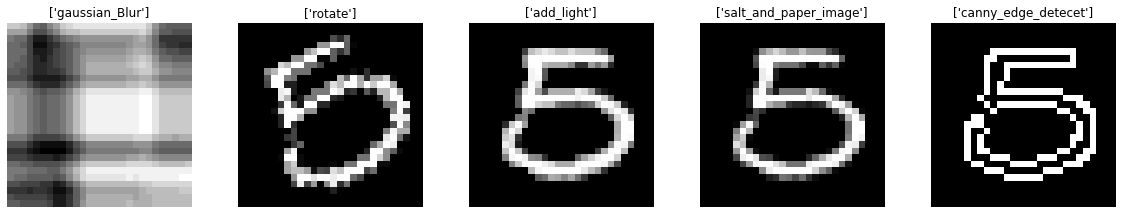

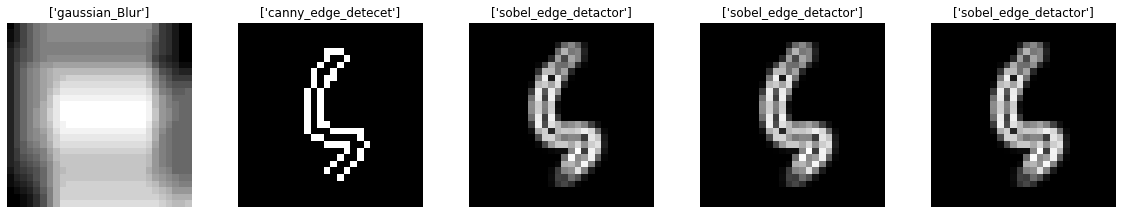

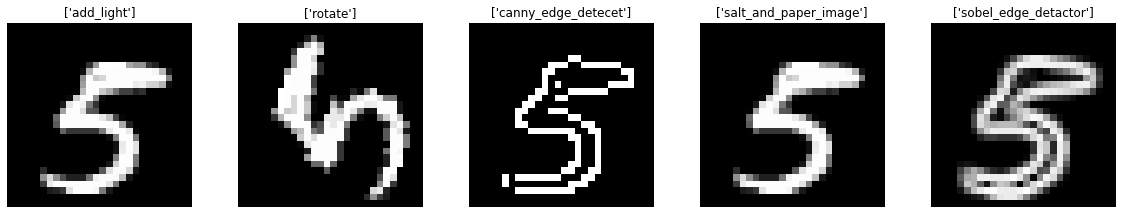

(8, 1)


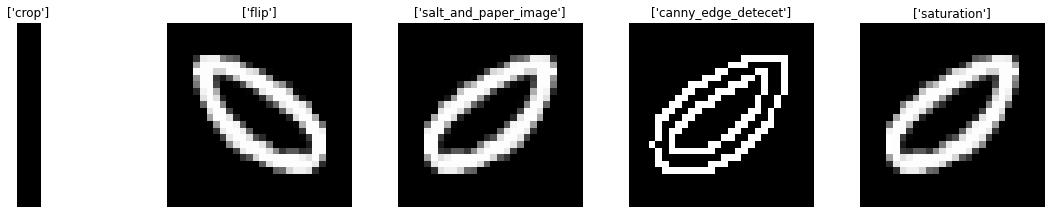

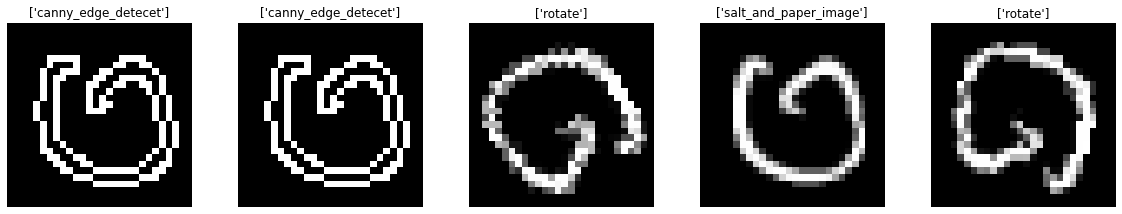

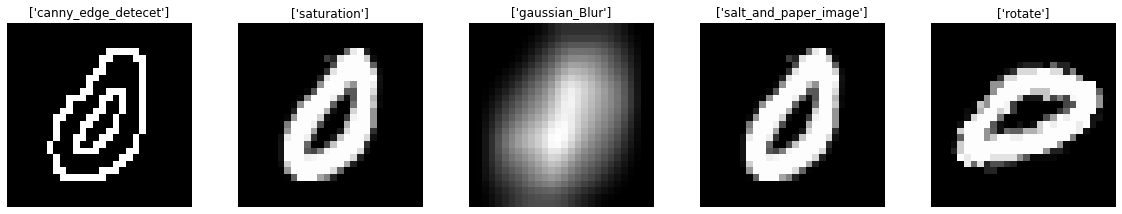

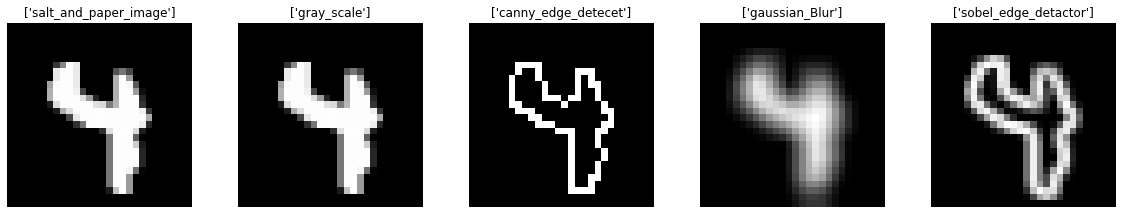

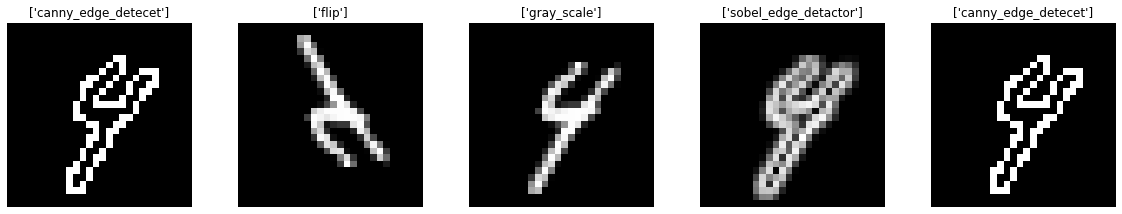

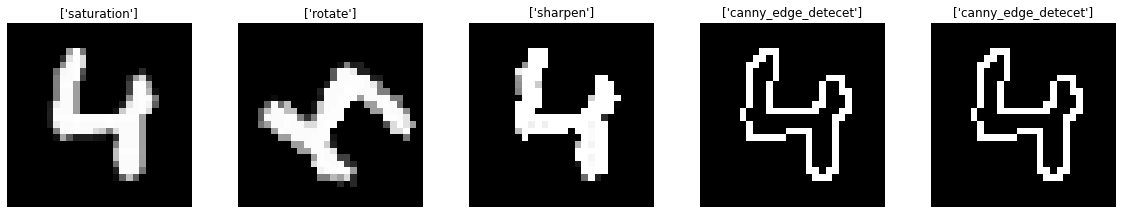

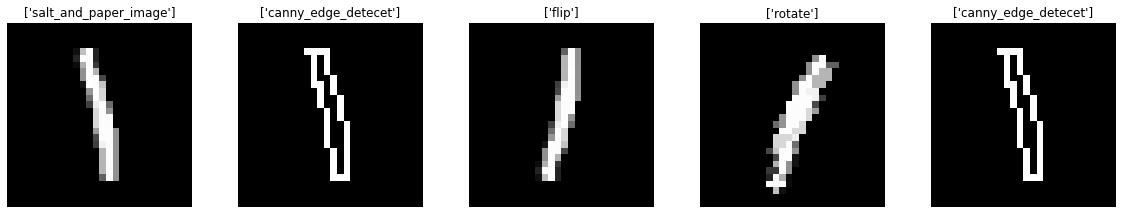

(6, 2)


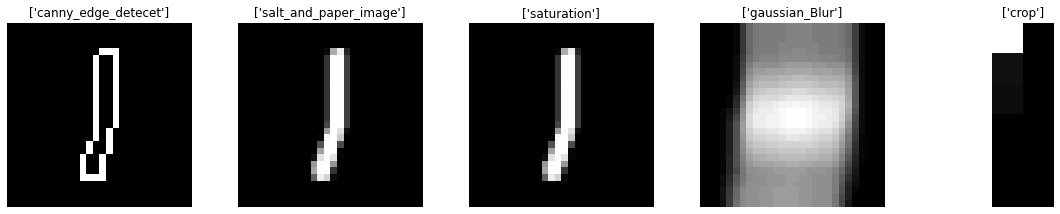

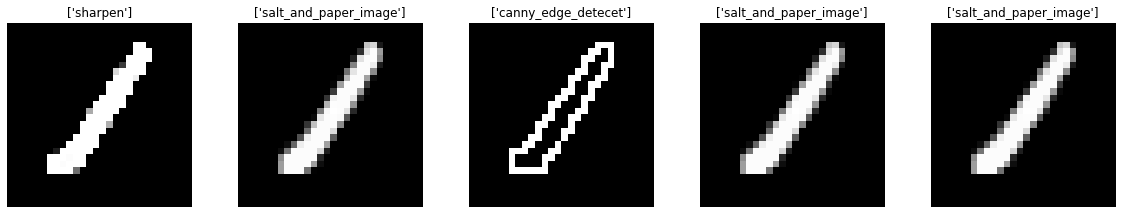

(9, 3)


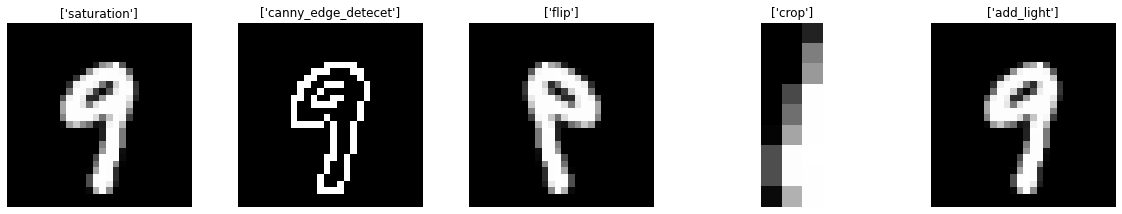

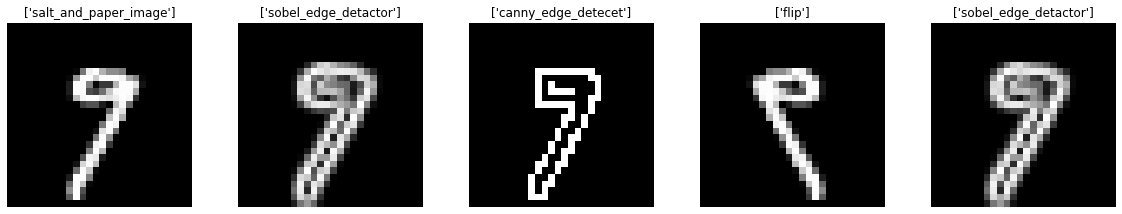

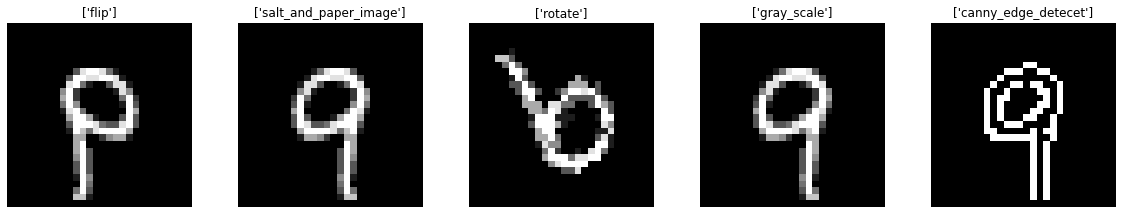

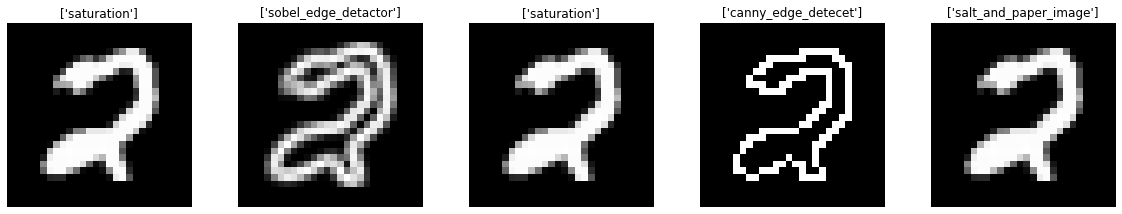

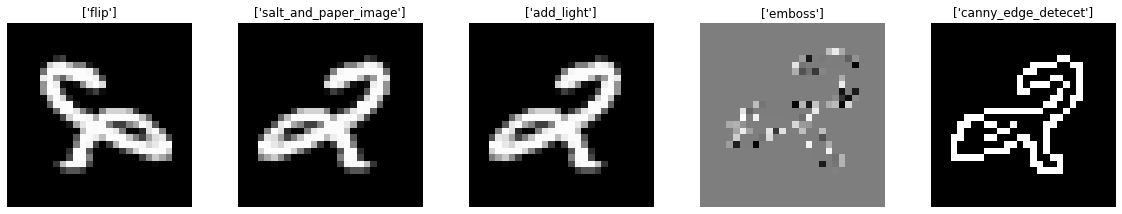

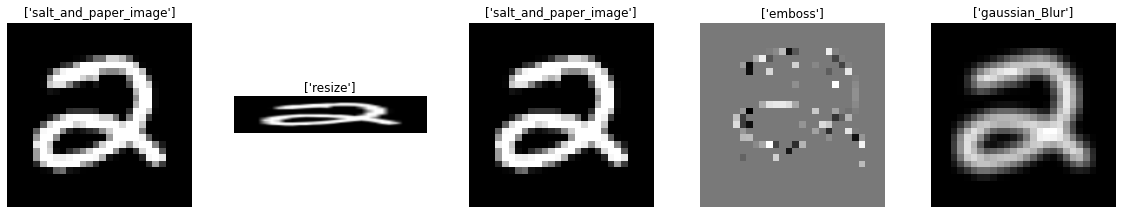

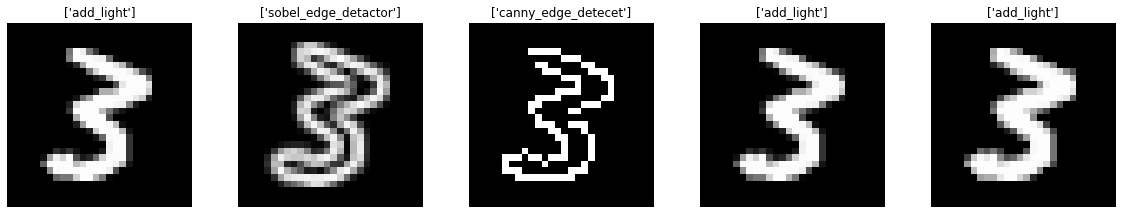

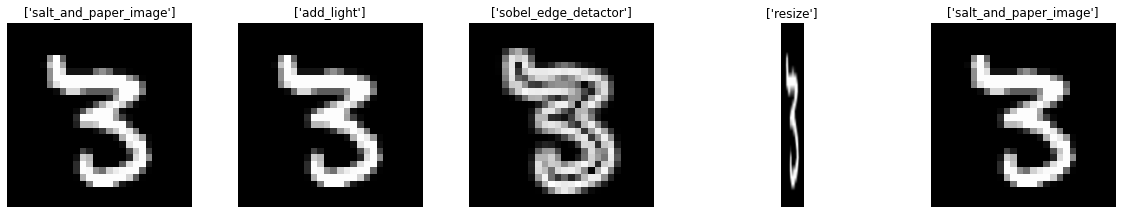

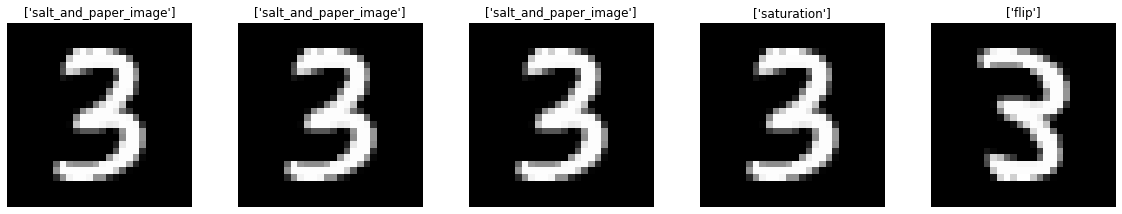

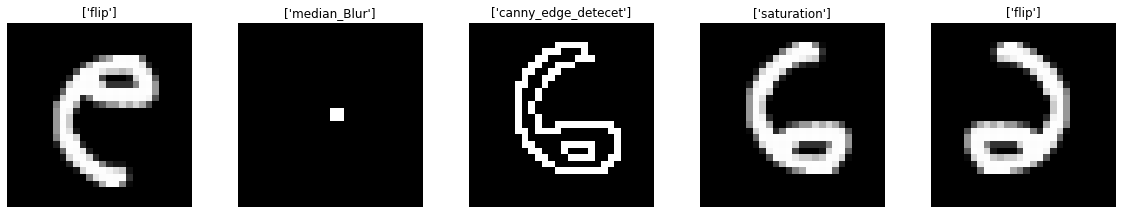

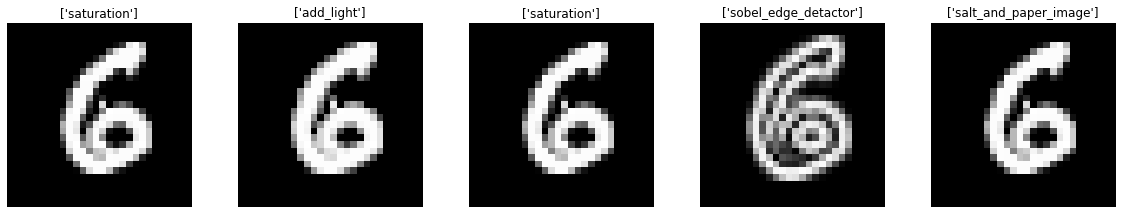

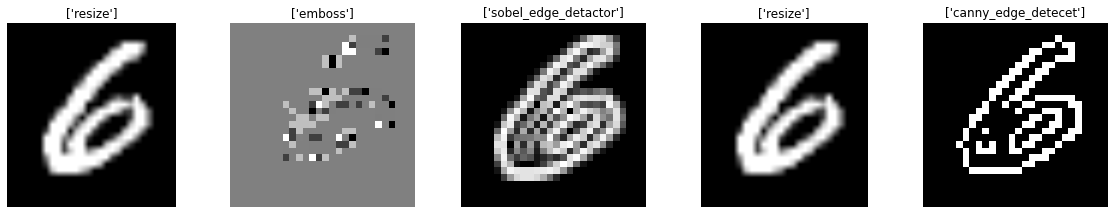

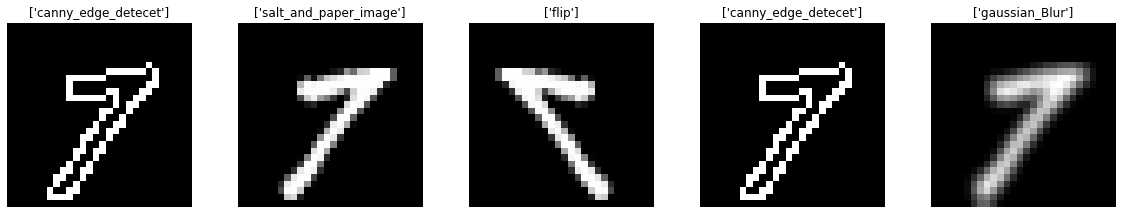

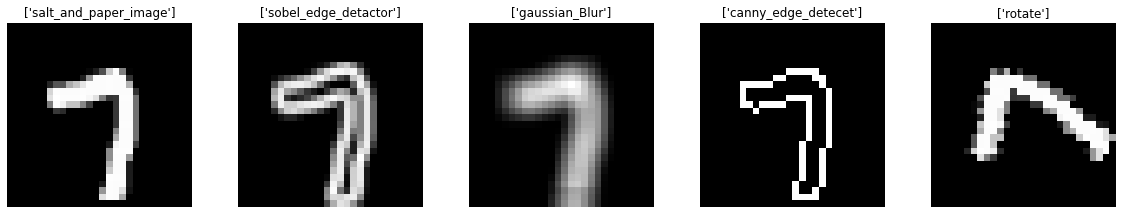

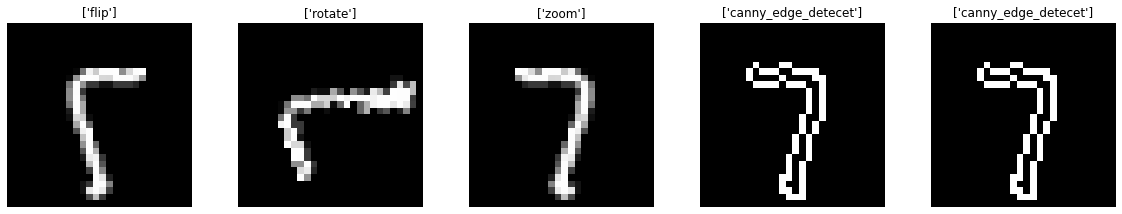

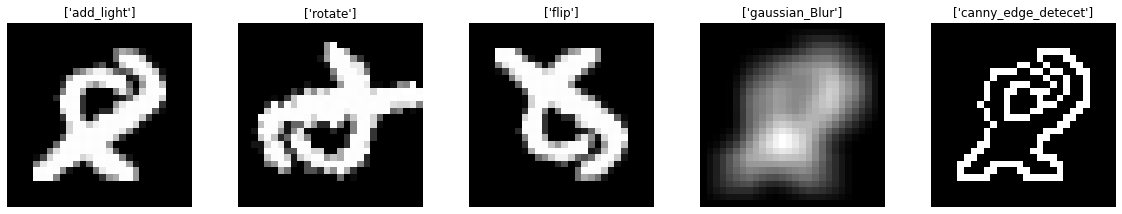

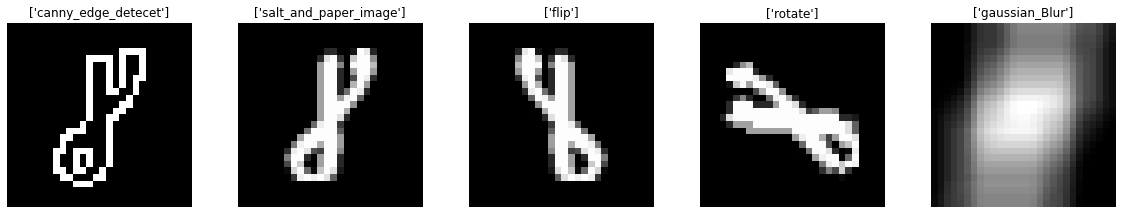

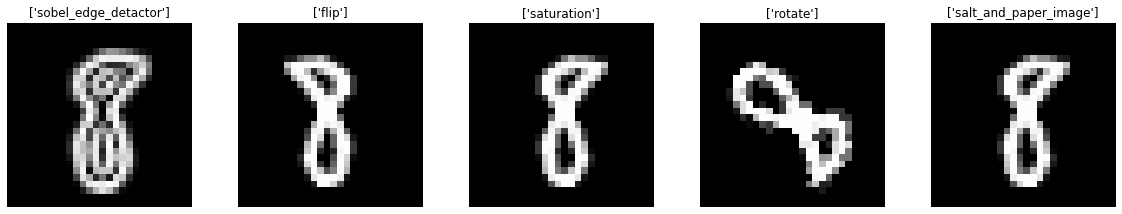

In [25]:
def rotate_image(image,angle):
  rows,cols = image.shape[0],image.shape[1]
  rotated_img = np.zeros_like(image)
  center_row = int(rows/2)
  center_col = int(cols/2)
  for r in range(rows):
    for c in range(cols):
      dist = np.sqrt(np.square(r-center_row)+np.square(c-center_col)) #euclidean distance between the current pixel to the center
      pixel_angle = np.arctan2((r-center_row),(c-center_col))-np.radians(angle)  #the new angle for the pixel in the new image 
      new_row = int(np.sin(pixel_angle)*dist)+center_row #
      new_col = int(np.cos(pixel_angle)*dist)+center_col #new location for the pixel in rotated img
      if new_row >= rows or new_col >= cols or new_row <0 or new_col < 0: #check if the new loc is outside the frame(original size) 
        continue
      rotated_img[r][c] = image[new_row][new_col]
  return rotated_img

 #1.e  
class ManyAugmentation(Augmentation):

  def __init__(self,image ,N:int , M :list):
    self.image = image
    self.N = N
    self.M = M

  def make_augmantations(self, image, all_augmantations):
    if 'flip' in all_augmantations :
      verticaly = np.random.choice([True,False] ,1, replace =False , p=[0.5,0.5])
      image = super().flip(image ,verticaly[0])
    if 'rotate' in all_augmantations :
      r_angle = np.random.uniform(0,360)
      image = super().rotate(image,r_angle)
    if 'gaussian_Blur' in all_augmantations :
      ksize = (np.random.randint(1,13,None))*2 + 1
      size = (ksize,ksize)
      sigma = np.random.randint(1,61,None)
      image = super().gaussian_Blur(image, size, sigma)
    if 'median_Blur' in all_augmantations :
      ksize = (np.random.randint(1,13,None))*2 + 1
      image = super().median_Blur(image,ksize)
    if 'zoom' in all_augmantations :
      zoom_size = np.random.randint(2,15,None)
      image = super().zoom(image, (image.shape[1],image.shape[0]), zoom_size)
    if 'crop' in all_augmantations :
      while True:
        lowx = np.random.randint(10,image.shape[1],None) 
        lowy = np.random.randint(10,image.shape[0],None) 
        highx = np.random.randint(lowx ,image.shape[1],None) 
        highy = np.random.randint(lowy ,image.shape[0],None) 
        if lowx < highx and lowy < highy:
          image = super().crop(image, lowy, highy ,lowx ,highx)
          break
    if 'sharpen' in all_augmantations :
      image = super().sharpen()
    if 'gray_scale' in all_augmantations :
      image = super().gray_scale(image)
    if 'resize' in all_augmantations :
      w = np.random.randint(200,2000)     
      h = np.random.randint(200,2000)
      image = super().resize(w, h)
    if 'emboss' in all_augmantations :
      image = super().emboss()
    if 'canny_edge_detecet' in all_augmantations :
      tresh_low = np.random.randint(50,150)     
      tresh_high = np.random.randint(150,250)
      image = super().canny_edge_detecet(tresh_low, tresh_high)
    if 'sobel_edge_detactor' in all_augmantations :
      kernelx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
      kernely = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
      image = super().sobel_edge_detactor(image,1,1, kernelx,kernely)
    if 'add_light' in all_augmantations :
      g = np.random.randint(1,3)
      image = super().add_light(gamma=g)
    return image
    if 'saturation' in all_augmantations :
      s = np.random.randint(50, 200)
      image = super().saturation(g)
    return image
    if 'salt_and_paper_image' in all_augmantations :
      p = np.random.random_sample()
      a = np.random.random_sample()
      image = super().salt_and_paper(p,a)
    return image

  def which_augment(self,all_augmants):
      choose = np.random.choice(all_augmants, self.N ,replace = False, p=self.M)
      copy_img = self.make_augmantations(self.image.copy(),choose)
      return copy_img , choose

  def create_augmented_images(self,num_of_imgs):
    lst = []
    titles = []
    plt.figure(figsize=[20, 40])
    for idx in range(num_of_imgs):
      which, title = self.which_augment(['flip', 'rotate', 'gaussian_Blur', 'median_Blur', 'zoom', 'crop', 'sharpen', 'gray_scale', 'resize', 'emboss', 'canny_edge_detecet', 'sobel_edge_detactor', 'add_light','saturation', 'salt_and_paper_image'])
      lst.append(which)
      titles.append(title)
    for idx,image in enumerate(lst):  
      plt.subplot(10, 5, idx + 1)
      plt.title(titles[idx])
      if len(image.shape) == 2:
        plt.imshow(image,cmap = 'gray')
      if len(image.shape) == 3:
        plt.imshow(image)
      plt.axis('off')
    plt.show()

for key1 in all_data.keys() :
   for idx in range(0,3):
    which_img =  np.random.randint(0,len(all_data[key1])) 
    augment = ManyAugmentation(all_data[key1][which_img], 1, [0.07, 0.05, 0.05, 0.02, 0.05, 0.01, 0.01, 0.01, 0.02 ,0.03, 0.17 ,0.17 ,0.1, 0.09, 0.15]) 
    augment.create_augmented_images(5)

שימוש באוגמנטציות נועד להגדלת בסיס הנתונים לצורך אימון. נעדיף להשתמש באוגמנטציות אשר לא משנות את התמונה המקורית.
ולא את צורת האוביקט בתמונה, על מנת שהמכונה שתרוץ על תמונות אלה תדע לזהות את האוביקט. 
ישנם אוגמנטציות שנעדיף להמנע מהם כמו למשל:

- crop
- zoom
- flip

מכיוון שאוגמנטציות אלו יכולות לשנות את האוביקטים בתמונה, למשל פליפ יציג לנו תמונה שונה( במספרים למשל לא נוכל להבין שזהו המספר 6 למשל). זום וקרופ יכולים להציג חלק מהתמונה כך שגם אז לא נבין מהי התמונה המקורית לכן נעדיף להימנע מאוגמנצטיות אלו.
שאר האוגמנטציות הקיימות במחלקה, לא ישפיעו על צורת התמונה לן לא תיהיה בעיה 
שנשתמש בהם, כמו למשל האוגמנטציות :

- gaussian blur
- gray scale
- sobel
- canny
וכו...


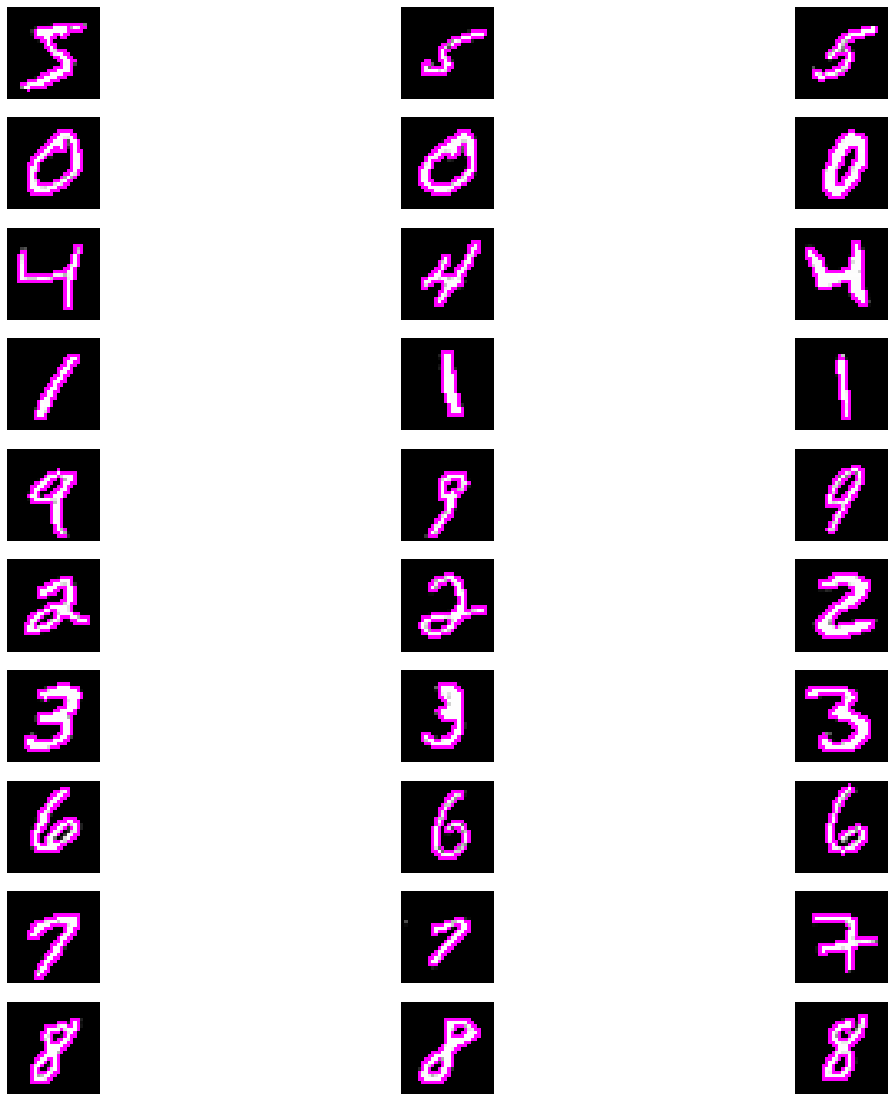

In [6]:
#1.f 
def draw_contours(image, tresh_low ,thresh_high):
  new_img = cv2.cvtColor(image,cv2.COLOR_GRAY2RGB)
  img = new_img.copy()
  edges = cv2.Canny(img, tresh_low, thresh_high)
  contour,_ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  draw_contours_img = cv2.drawContours(img, contour, -1, (255,0,255), 1)
  return draw_contours_img


def show_countrous():
  counter = 0
  plt.figure(figsize=[20,20])
  for key1 in all_data.keys() :
    for idx in range(0,3):
      countour = draw_contours(all_data[key1][idx],150,200)
      plt.subplot(10, 3 ,counter + 1)
      plt.axis('off')
      plt.imshow(countour)
      counter += 1
  plt.show()
show_countrous() 

בחלק זה נתבקשנו לטעון בסיס נתונים קיים של ספרות שונות מ0-9 וליצור מהם בסיס נתונים חדש עם ספרות מ0-100.
על בסיס נתונים זה בצענו אוגמנטציות שונות באופן רנדומלי, וראינו כי יש אוגמנטציות שיותר כדאי להשתמש בהם, ויש כאלה שפחות.
לאחר מכן השתמשנו בפונקציה אשר מוצאת גבולות של ספרות, ומציגה אותם.

- sharpen - חידוד תמונה
- gray_scale - שחור לבן
- resize - משנה את גודל התמונה
- emboss - הבלטת צללים
- canny edge detector - זיהוי קשתות הקצוות בתמונה
- sobel edge detector - זיהוי קשתות הקצוות בתמונה
- add_light' -מוסיף בהירות לתמונה 
- saturation - שינוי עוצמת הצבע בתמונה
- salt_and_paper_image -  הוספת רעש לתמונה 
- sharpen - חידוד התמונה



# **Part 2** 

In [0]:
#2.a.1
def draw_triangle():
  img = np.zeros((50, 50, 3)).astype('uint8')
  ran_x1 = np.random.randint(0,45)
  ran_y1 = np.random.randint(0,45)
  color1 = (list(np.random.choice(range(256), size=3)))  
  color =[int(color1[0]), int(color1[1]), int(color1[2])]  
  while True:
    ran_x2 = np.random.randint(0,50)
    ran_y2 = np.random.randint(0,50)
    if abs(ran_x1 -ran_x2) >= 5 and abs(ran_y1 -ran_y2) >= 5:
      break
  while True:
    ran_x3 = np.random.randint(0,50)
    ran_y3 = np.random.randint(0,50)
    if (ran_x2 != ran_x3 and ran_y2 != ran_y3) and (ran_x1 != ran_x3 and ran_y1 != ran_y3):
      if abs((ran_x1*(ran_y2 - ran_y3) + ran_x2*(ran_y3 - ran_y1) +ran_x3*(ran_y1 -ran_y2))/2) >= 30:
        pts = np.array([[ran_x1,ran_y1], [ran_x2,ran_y2], [ran_x3,ran_y3]], np.int32)
        pts = pts.reshape((-1, 1, 2)) 
        img = cv2.polylines(img, [pts], True, color, 1)
        plt.imshow(img)
        return img

#2.a.2
def draw_rectangle():
  img = np.zeros((50, 50, 3)).astype('uint8')
  while True:
    ran_x1 = np.random.randint(0,45)
    ran_y1 = np.random.randint(0,45)
    ran_x2 = np.random.randint(0,45)
    ran_y2 = np.random.randint(0,45)
    color1 = (list(np.random.choice(range(256), size=3)))  
    color =[int(color1[0]), int(color1[1]), int(color1[2])]  
    if abs((abs(ran_x1 - ran_x2)*abs(ran_y1- ran_y2))) >= 40:
      img = cv2.rectangle(img, (ran_x1,ran_y1), (ran_x2,ran_x2), color, 1)
      plt.imshow(img)
      return img

#2.a.4
def draw_eliipse(circle = False):
  img = np.zeros((50, 50, 3)).astype('uint8')
  center_x = np.random.randint(15,35)
  center_y = np.random.randint(15,35)
  size_x = np.random.randint(3,12)
  size_y = np.random.randint(3,12)
  circle_size = np.random.randint(3,20)
  color1 = (list(np.random.choice(range(256), size=3)))  
  color =[int(color1[0]), int(color1[1]), int(color1[2])]  
  if circle == False: #draw eliipse
    img = cv2.ellipse(img, (center_x, center_y), (size_x, size_y), -10, 0, 360, color, 1)
  if circle: ##draw circle
    img = cv2.circle(img,(center_x,center_y),circle_size,color,1)
  plt.imshow(img)
  return img

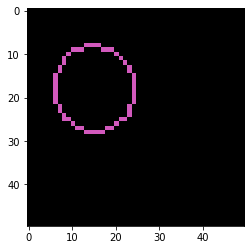

In [8]:
#2.a.4
def create_shapes_data_base():
  shapes_data = {}
  shapes = ['triangle','rectangle','circle']
  for shape in shapes:
    shapes_data[shape] = []
    for image in range(0,300):
      if shape == 'triangle':
        shapes_data[shape] += [draw_triangle()]
      if shape == 'rectangle':
        shapes_data[shape] += [draw_rectangle()]
      if shape == 'circle':
        shapes_data[shape] += [draw_eliipse(circle = False)]
  return shapes_data

new_shapes_data = create_shapes_data_base()

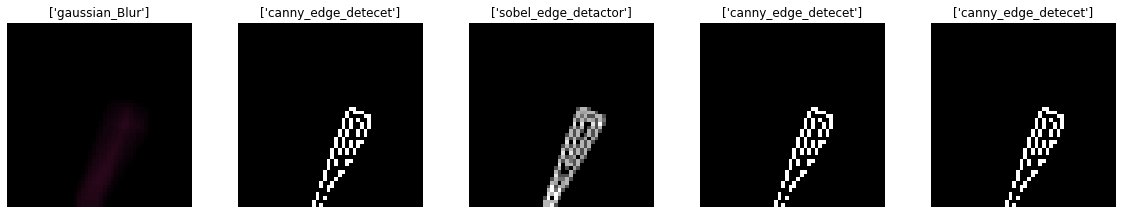

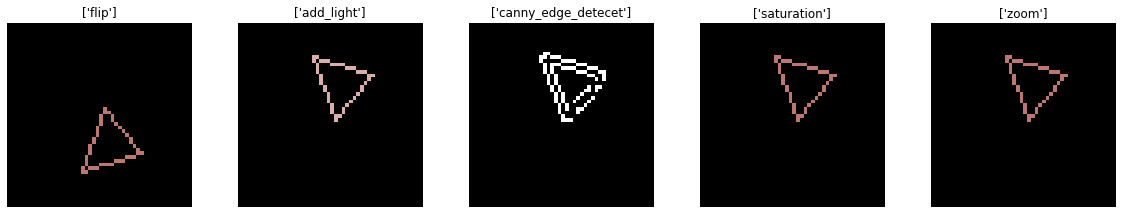

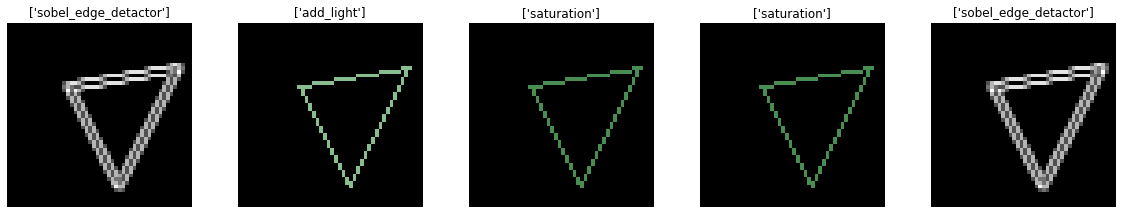

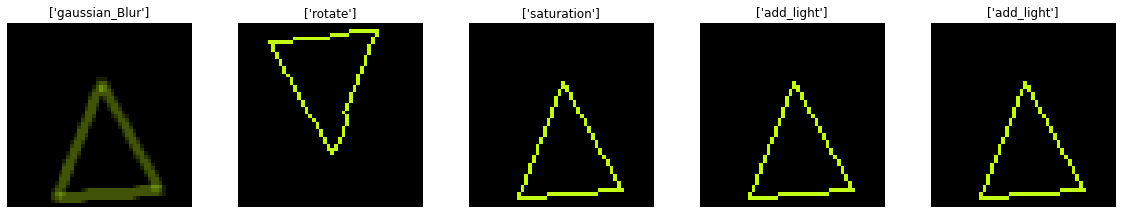

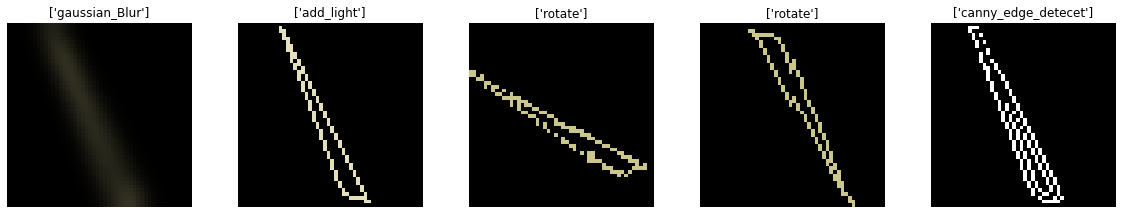

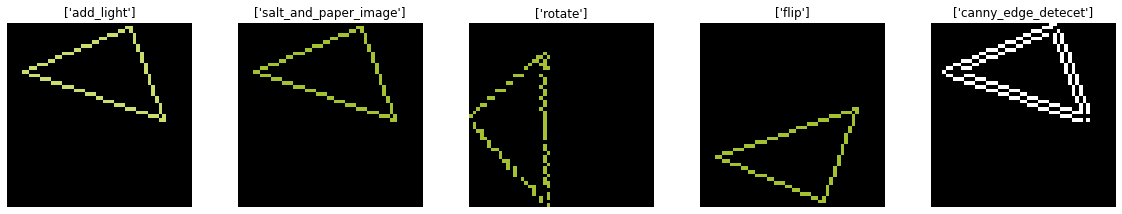

(2, 31, 3)


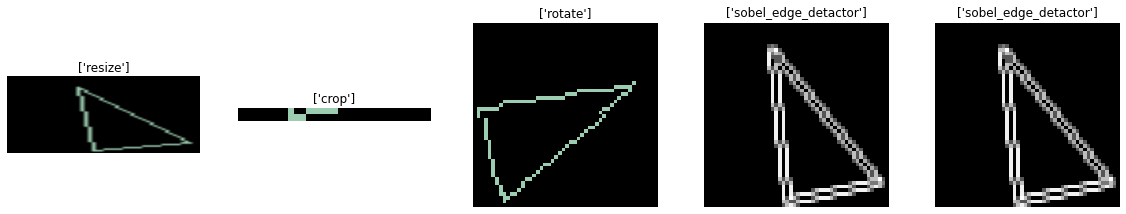

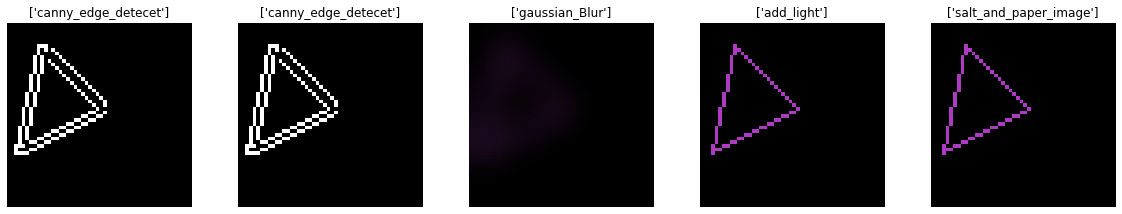

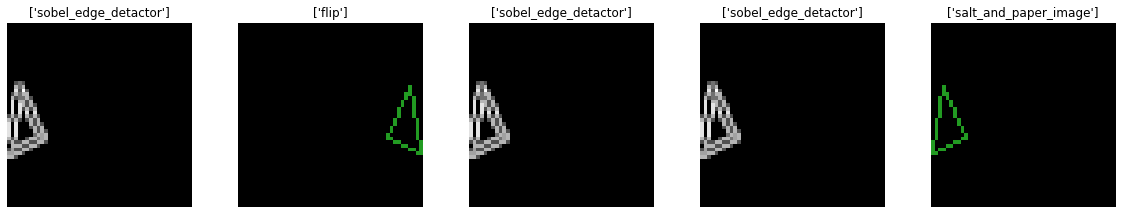

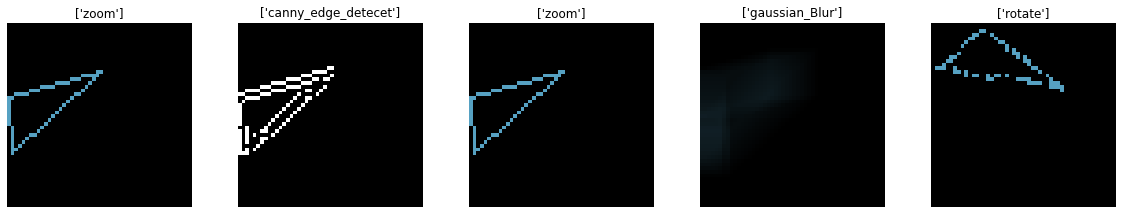

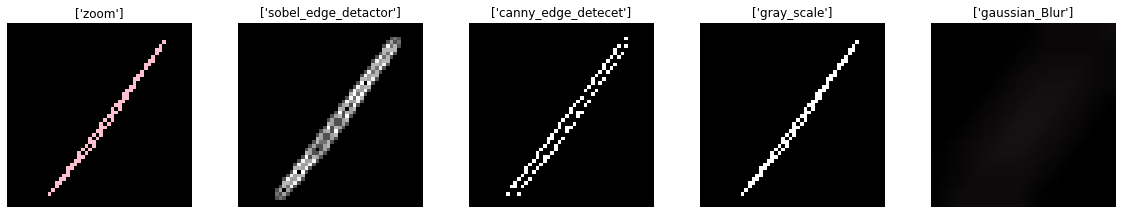

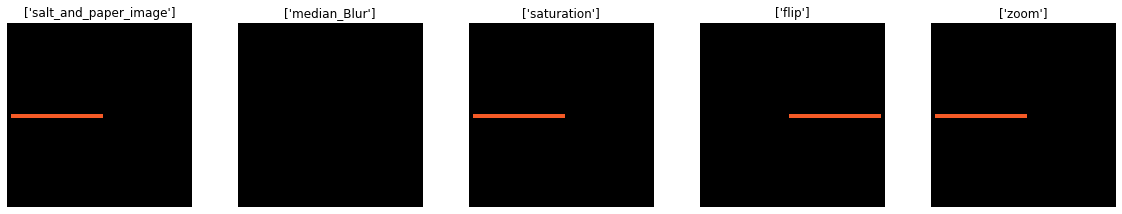

(11, 8, 3)


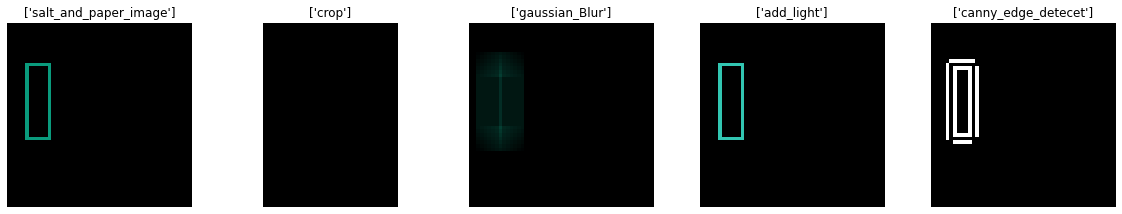

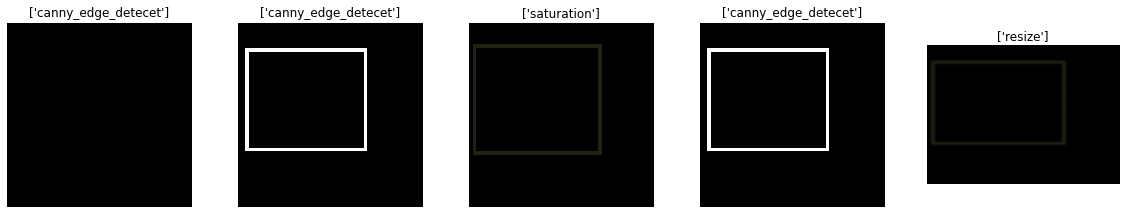

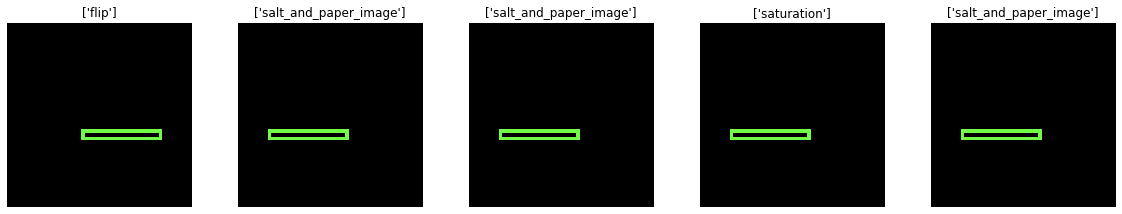

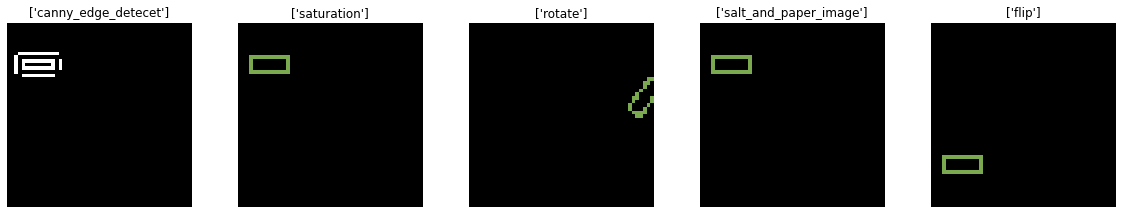

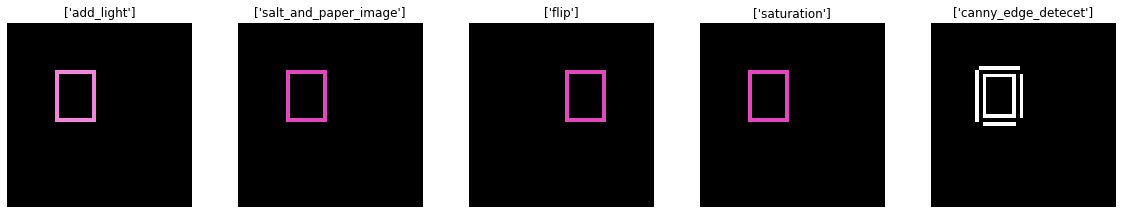

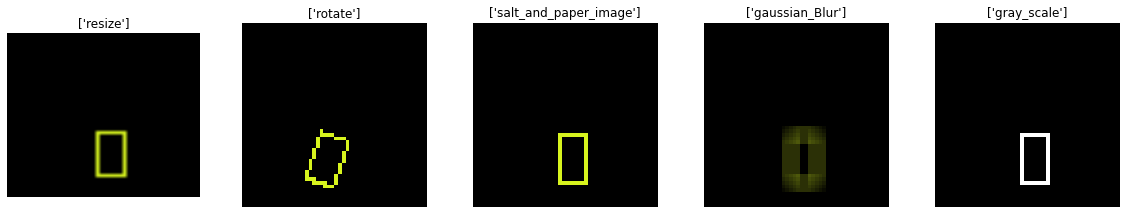

(6, 10, 3)


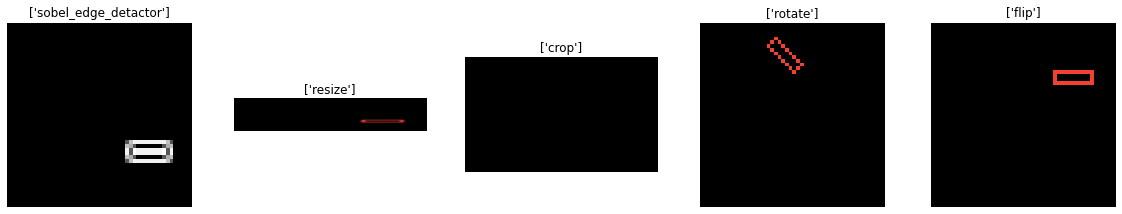

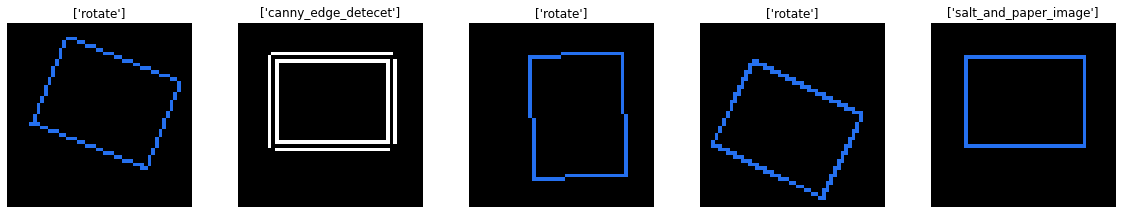

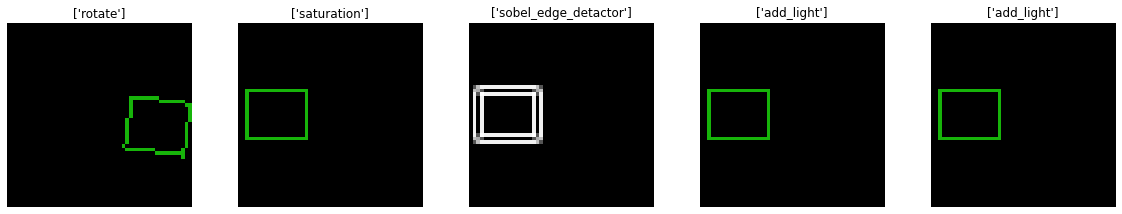

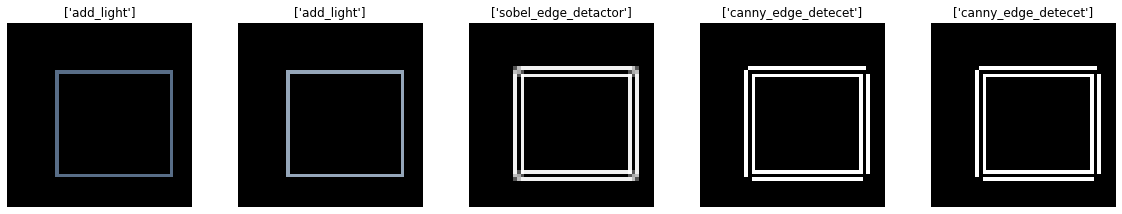

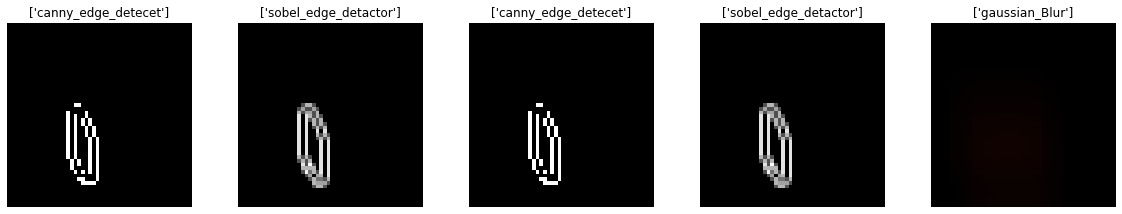

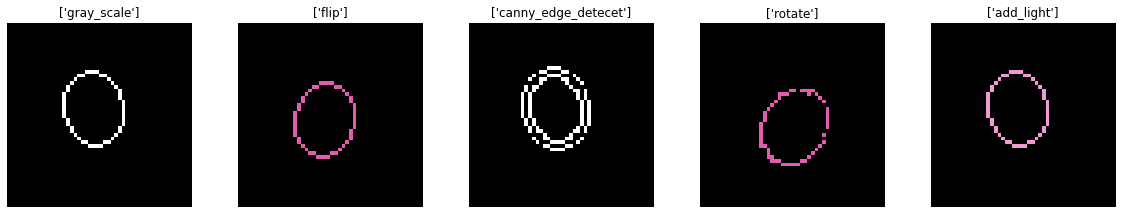

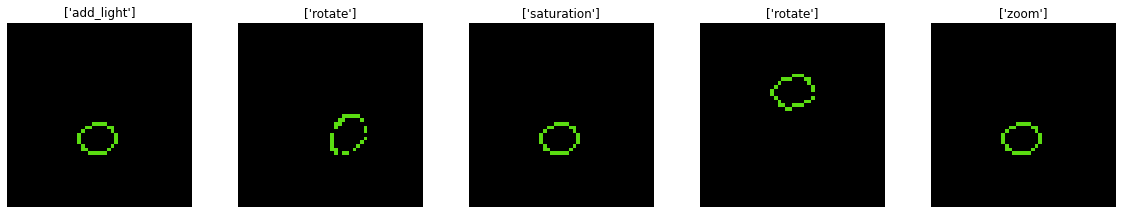

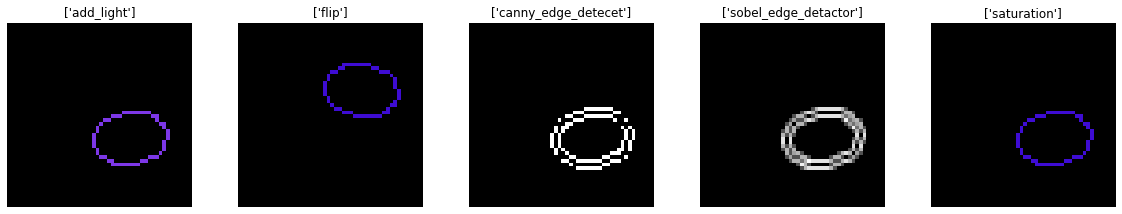

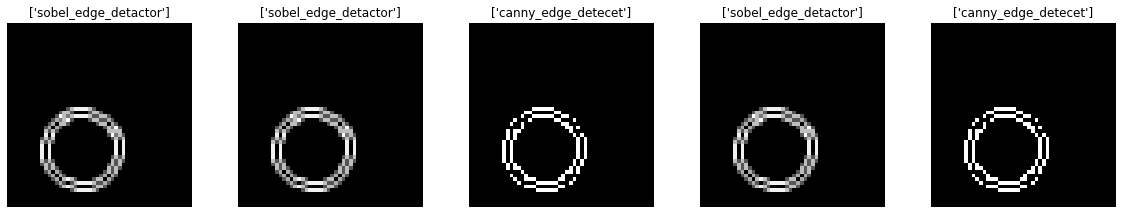

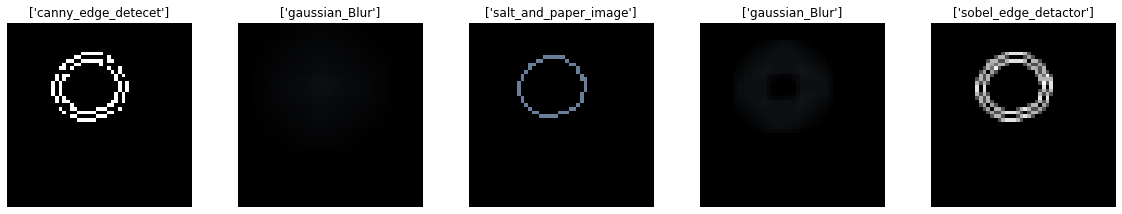

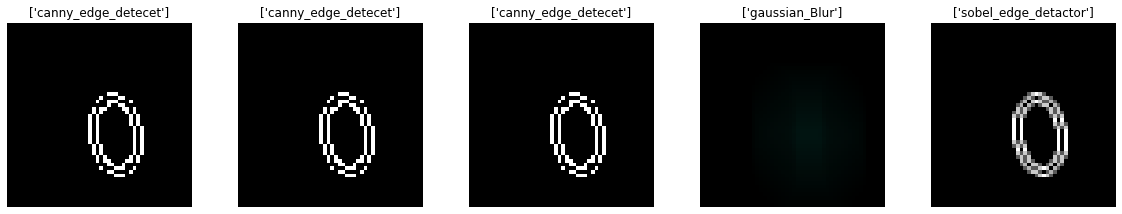

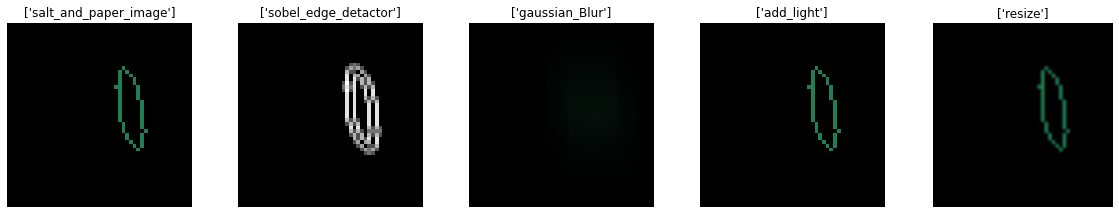

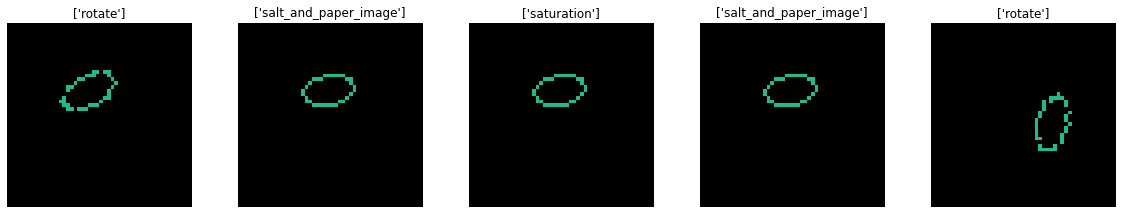

(1, 2, 3)


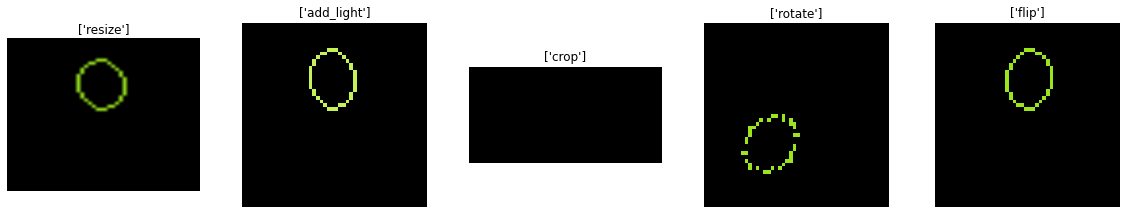

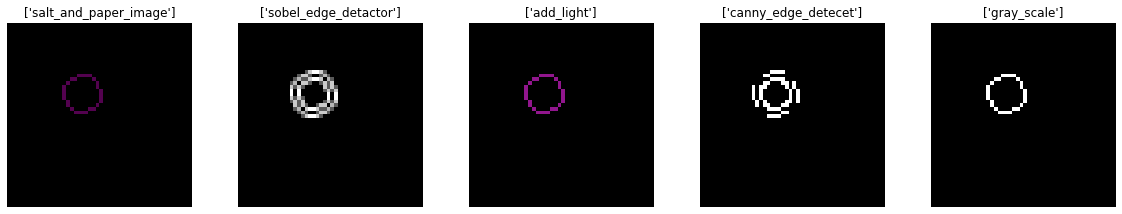

In [9]:
#2.b
for key1 in new_shapes_data.keys() :
  for idx in range(0,11):
    which_img =  np.random.randint(0,len(new_shapes_data[key1])) 
    augment = ManyAugmentation(new_shapes_data[key1][which_img], 1, [0.07, 0.05, 0.05, 0.02, 0.05, 0.01, 0.01, 0.01, 0.02 ,0.03, 0.17 ,0.17 ,0.1 , 0.09, 0.15]) 
    augment.create_augmented_images(5)

In [0]:
#2.c
class Data():

  def split_data_xy(self):
    data_x = []
    data_y = []
    for key1 in new_shapes_data.keys() :
      for idx in range(len(new_shapes_data[key1])):
        data_y += [key1]
        data_x += [new_shapes_data[key1][idx]]
    return data_x, data_y

  def split_test_train(self, data_x, data_y, train_size = 0.7):
    test_x = []
    train_x = []
    arr = list(zip(data_x,data_y))
    np.random.shuffle(arr)
    data_x , data_y = zip(*arr)
    train_x = data_x[0 : int(train_size*len(data_x))]
    test_x = data_x[int(train_size*len(data_x)): len(data_x)]
    return test_x, train_x ,data_y
      
  def load_data(self):
    datax , datay = self.split_data_xy()
    testx ,trainx ,datay1  = self.split_test_train(datax, datay)
    return (trainx,datay1) ,(testx,datay1)

data = Data()
(x_train, y_train), (x_test, y_test) = data.load_data()

בחלק זה נתבקשנו ליצור בסיס נתונים המורכב מ3 צורות שונות שנוצרות בצורה אקראית בכל פעם.
לאחר יצירת בסיס הנתונים, הפעלנו אוגמנטציות שונות על צורות שונות, ובומה למה שנאמר בהסבר למעלה, יש אוגמנטציות בהם נרצה פחות להשתמש על מנת שלא ישנו לנו את צורת האוביקט.
לאחר הצגת אוגמנטציות שונות על בסיס הנתונים,הכנו את בסיס הנתונים לאימון ע"י ערבוב הדאטה, ולאחר מכן פיצלנו אותו לצורה המבוקשת.
